# Field lines of the displacement field

In [1]:
import infinite_conformal as infinite_conformal
import infinite_fourier as infinite_fourier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tqdm

In [5]:
# declare geometry
epss=[1,5,2] # dielectric constant of layer 1, 2 and 3
t=[0.2] #thickness of layer 2
etas=[0.3,0] # cover fraction of electrodes, between layer 1 and 2 and between layer 2 and 3
# declare model parameters
LAcomp=2 # number of linear algebra componens
max_n=180 # number of fourier components
# make case
case = infinite_fourier.multiple_recursive_images(etas,t,epss,epss,LAcomp,max_n,accuracy_limit=10**-15,hybrid=True)
print(case.get_C(), 'F/m')

1.6549234995791352e-11 F/m


In [85]:
min_x=-0.5
max_x=0.5
min_y=-4 # < need to capture full field in the y-direction, assume field ~ 0 at y = -4
max_y=4 # < need to capture full field in the y-direction, assume field ~ 0 at y = 4
step=0.01
x = np.arange(min_x, max_x+step, step)
y = np.arange(min_y, max_y+step, step)
xx, yy = np.meshgrid(x, y)

In [86]:
# function to get dielectric constant -> for calculating displacement field from electric field
def get_eps(epss,t,y):
    if y<0:
        return(epss[0])
    elif y<t[0]:
        return(epss[1])
    return(epss[2])

In [98]:
#Calculate displacemnt field
D_x=np.zeros((len(y),len(x)))
for j in range(len(y)):
    v,e_x,e_y = case.get_V_Ex_Ey(x,y[j])
    D_x[j,:]+=e_x*get_eps(epss,t,y[j])*step
eps0=8.8541878128*10**-12
D_x*=eps0
#integrate displacement field
cap=np.sum(D_x[:,len(x)//2]) # if we had max_y=inf -> min_y=inf, this would have been the same as case.get_C()
y_zero_index=int(-min_y//step+1)
for j in range(y_zero_index-1):
    D_x[j+1]+=D_x[j]
for j in range(len(y),y_zero_index+1,-1):
    D_x[j-2]+=D_x[j-1]
D_x[0:y_zero_index,:]=-D_x[0:y_zero_index,:]
D_x[0:y_zero_index,:]+=cap


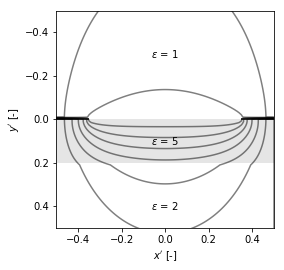

In [101]:
fig, ax = plt.subplots(1,1)
# plot field lines
CS=ax.contour(xx,yy, D_x,colors=[[0,0,0,0.5]],levels=9)
ax.set_aspect('equal', 'box')
ax.set_ylim([-0.5,0.5])
# set_labels 
ax.set_xlabel(r"$x'$ [-]")
ax.set_ylabel(r"$y'$ [-]")
# draw electrodes 
ax.plot([[-0.5,0.5],[-0.5+etas[0]/2,0.5-etas[0]/2]],[[0,0],[0,0]],'k',solid_capstyle='butt')
# shade the film 
ax.add_patch(matplotlib.patches.Rectangle(
            (-0.5,0),   # (x,y)
            1,          # width
            t[0],          # height
            facecolor=[0,0,0,0.1]))
# add dielectric constant text
ax.text(0,-0.3,r'$\varepsilon$ = '+str(epss[0]), ha='center',va='center')
ax.text(0,t[0]/2,r'$\varepsilon$ = '+str(epss[1]), ha='center',va='center')
ax.text(0,0.4,r'$\varepsilon$ = '+str(epss[2]), ha='center',va='center')
# flip y axis
ax.invert_yaxis()